In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
import warnings 
warnings.filterwarnings('ignore')

In [2]:
#read the pricerunner dataset as df2
colsdf2=['Product ID','Product Title','Vendor ID','Cluster ID','Cluster Label','Category ID', 'Category Label']
df2=pd.read_csv("C:/Users/ait0s/Downloads/pricerunner_aggregate.csv", names=colsdf2)
df2.head()

,Product ID,Product Title,Vendor ID,Cluster ID,Cluster Label,Category ID,Category Label
0,1,apple iphone 8 plus 64gb silver,1,1,Apple iPhone 8 Plus 64GB,2612,Mobile Phones
1,2,apple iphone 8 plus 64 gb spacegrau,2,1,Apple iPhone 8 Plus 64GB,2612,Mobile Phones
2,3,apple mq8n2b/a iphone 8 plus 64gb 5.5 12mp sim...,3,1,Apple iPhone 8 Plus 64GB,2612,Mobile Phones
3,4,apple iphone 8 plus 64gb space grey,4,1,Apple iPhone 8 Plus 64GB,2612,Mobile Phones
4,5,apple iphone 8 plus gold 5.5 64gb 4g unlocked ...,5,1,Apple iPhone 8 Plus 64GB,2612,Mobile Phones


In [3]:
#explore df2 
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35311 entries, 0 to 35310
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Product ID      35311 non-null  int64 
 1   Product Title   35311 non-null  object
 2   Vendor ID       35311 non-null  int64 
 3   Cluster ID      35311 non-null  int64 
 4   Cluster Label   35311 non-null  object
 5   Category ID     35311 non-null  int64 
 6   Category Label  35311 non-null  object
dtypes: int64(4), object(3)
memory usage: 1.9+ MB


In [4]:
numcat=df2['Category Label'].nunique()
print(numcat)

10


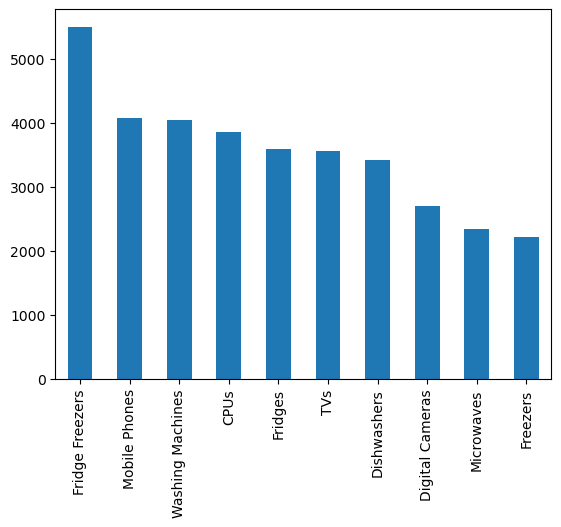

In [5]:
df2catcounts=df2['Category Label'].value_counts()
df2catcounts.plot(kind='bar')
plt.show()

In [7]:
df2.groupby('Category Label')['Product Title'].count().sort_values(ascending=False)

Category Label
Fridge Freezers     5501
Mobile Phones       4081
Washing Machines    4044
CPUs                3862
Fridges             3584
TVs                 3564
Dishwashers         3424
Digital Cameras     2697
Microwaves          2342
Freezers            2212
Name: Product Title, dtype: int64

In [8]:
#change all values to lowercase
df2['Product Title']= df2['Product Title'].str.lower()
#remove special characters
df2['Product Title']= df2['Product Title'].str.replace(r'[^a-zA-Z0-9]', '', regex=True)
#remove all whitespace
df2['Product Title']= df2['Product Title'].str.strip()

df2.head()

,Product ID,Product Title,Vendor ID,Cluster ID,Cluster Label,Category ID,Category Label
0,1,appleiphone8plus64gbsilver,1,1,Apple iPhone 8 Plus 64GB,2612,Mobile Phones
1,2,appleiphone8plus64gbspacegrau,2,1,Apple iPhone 8 Plus 64GB,2612,Mobile Phones
2,3,applemq8n2baiphone8plus64gb5512mpsimfreesmartp...,3,1,Apple iPhone 8 Plus 64GB,2612,Mobile Phones
3,4,appleiphone8plus64gbspacegrey,4,1,Apple iPhone 8 Plus 64GB,2612,Mobile Phones
4,5,appleiphone8plusgold5564gb4gunlockedsimfree,5,1,Apple iPhone 8 Plus 64GB,2612,Mobile Phones


In [9]:
#use vectorization to transform Product Titles
countvectorizer = CountVectorizer()
product_title = countvectorizer.fit_transform(df2['Product Title'])
product_title = np.array(product_title.todense())

In [10]:
#use Label Encoder to transform target variable
X= product_title
y= df2['Category Label']

LE=LabelEncoder()
yencoded=LE.fit_transform(y.values)

In [12]:
#map out the categories
category_mapping= {label: encoded for label, encoded in zip(LE.classes_,LE.transform(LE.classes_))}
print(category_mapping)

{'CPUs': 0, 'Digital Cameras': 1, 'Dishwashers': 2, 'Freezers': 3, 'Fridge Freezers': 4, 'Fridges': 5, 'Microwaves': 6, 'Mobile Phones': 7, 'TVs': 8, 'Washing Machines': 9}


In [20]:
#split dataset into training and testing data 80/20

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, yencoded, test_size=0.2,random_state=42)

In [21]:
#develop classifier model using Multinomial Naive Bayes

from sklearn.naive_bayes import MultinomialNB

#train the model

MNB_model=MultinomialNB().fit(X_train,y_train)

#make the prediction

y_pred = MNB_model.predict(X_test)


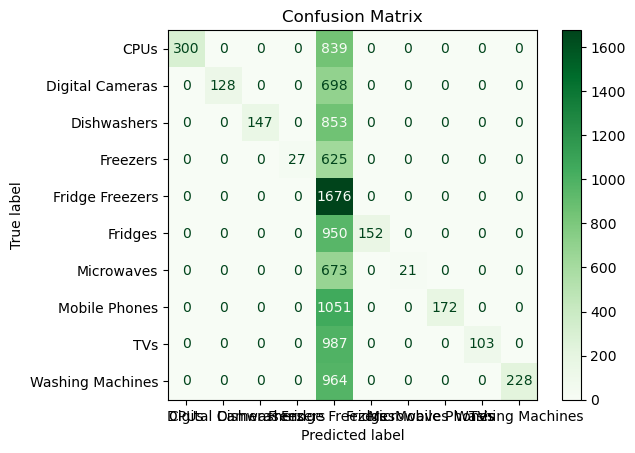

In [30]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=LE.classes_)
disp.plot(cmap=plt.cm.Greens)
plt.title('Confusion Matrix')
plt.show()

In [34]:
accuracy = accuracy_score(y_test, y_pred)
classification_report = classification_report(y_test, y_pred)

print('\n Accuracy: ', accuracy_score(y_test, y_pred))
print('\nClassification Report')
print('======================================================')
print('\n', classification_report)


 Accuracy:  0.2788370775910893

Classification Report

               precision    recall  f1-score   support

           0       1.00      0.26      0.42      1139
           1       1.00      0.15      0.27       826
           2       1.00      0.15      0.26      1000
           3       1.00      0.04      0.08       652
           4       0.18      1.00      0.30      1676
           5       1.00      0.14      0.24      1102
           6       1.00      0.03      0.06       694
           7       1.00      0.14      0.25      1223
           8       1.00      0.09      0.17      1090
           9       1.00      0.19      0.32      1192

    accuracy                           0.28     10594
   macro avg       0.92      0.22      0.24     10594
weighted avg       0.87      0.28      0.25     10594



In [35]:
def othermodels(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Model Accuracy: {accuracy*100}%")
    return y_pred

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
rf_ypred = othermodels(rf_model, X_train, y_train, X_test, y_test)